In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df = pd.read_csv('dataset.csv')
df.head()

,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,InternetService,Contract,MonthlyCharges,Churn
0,Female,0,No,1,No,No,DSL,Month-to-month,29.85,No
1,Male,0,No,34,Yes,No,DSL,One year,56.95,No
2,Male,0,No,2,Yes,No,DSL,Month-to-month,53.85,Yes
3,Male,0,No,45,No,No,DSL,One year,42.30,No
4,Female,0,No,2,Yes,No,Fiber optic,Month-to-month,70.70,Yes


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           7043 non-null   object 
 1   SeniorCitizen    7043 non-null   int64  
 2   Dependents       7043 non-null   object 
 3   tenure           7043 non-null   int64  
 4   PhoneService     7043 non-null   object 
 5   MultipleLines    7043 non-null   object 
 6   InternetService  7043 non-null   object 
 7   Contract         7043 non-null   object 
 8   MonthlyCharges   7043 non-null   float64
 9   Churn            7043 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 550.4+ KB


In [11]:
df.isnull().sum()

gender                     0
SeniorCitizen              0
Dependents                 0
tenure                     0
PhoneService               0
MultipleLines              0
InternetService            0
MonthlyCharges             0
Churn                      0
Contract_Month-to-month    0
Contract_One year          0
Contract_Two year          0
dtype: int64

In [30]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Columns to label encode
binary_columns = ['gender', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'Churn']

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to binary columns
for col in binary_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Apply One-Hot Encoding to 'Contract' column
encoder = OneHotEncoder(sparse_output=False)
df[['Contract_Month-to-month', 'Contract_One year', 'Contract_Two year']] = encoder.fit_transform(df[['Contract']])
df = df.drop('Contract', axis=1)

df.head()

,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,InternetService,MonthlyCharges,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year
0,0,0,0,1,0,0,0,29.85,0,1.0,0.0,0.0
1,1,0,0,34,1,0,0,56.95,0,0.0,1.0,0.0
2,1,0,0,2,1,0,0,53.85,1,1.0,0.0,0.0
3,1,0,0,45,0,0,0,42.30,0,0.0,1.0,0.0
4,0,0,0,2,1,0,1,70.70,1,1.0,0.0,0.0


In [21]:
df.to_csv('preprocessed_dataset.csv', index=False)

In [31]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (5634, 11) (5634,)
Testing set shape: (1409, 11) (1409,)


In [32]:
X_train.head()

,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,InternetService,MonthlyCharges,Contract_Month-to-month,Contract_One year,Contract_Two year
2142,0,0,1,21,1,0,0,64.85,0.0,1.0,0.0
1623,0,0,0,54,1,1,1,97.20,0.0,0.0,1.0
6074,1,0,0,1,0,0,0,23.45,1.0,0.0,0.0
1362,1,0,0,4,1,0,1,70.20,1.0,0.0,0.0
6754,1,0,1,0,1,1,0,61.90,0.0,0.0,1.0


In [33]:
X_test.head()

,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,InternetService,MonthlyCharges,Contract_Month-to-month,Contract_One year,Contract_Two year
185,0,0,0,1,0,0,0,24.80,1.0,0.0,0.0
2715,1,0,0,41,1,1,0,25.25,1.0,0.0,0.0
3825,0,0,1,52,1,0,0,19.35,0.0,0.0,1.0
1807,0,0,0,1,1,0,1,76.35,1.0,0.0,0.0
132,1,0,0,67,1,0,0,50.55,0.0,0.0,1.0


In [34]:
y_train.head()

2142    0
1623    0
6074    1
1362    1
6754    0
Name: Churn, dtype: int64

In [35]:
y_test.head()

185     1
2715    0
3825    0
1807    1
132     0
Name: Churn, dtype: int64

In [23]:
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

In [36]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Fit the scaler on the training data
X_train[['tenure', 'MonthlyCharges']] = scaler.fit_transform(X_train[['tenure', 'MonthlyCharges']])
X_test[['tenure', 'MonthlyCharges']] = scaler.transform(X_test[['tenure', 'MonthlyCharges']])

X_train.head()


,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,InternetService,MonthlyCharges,Contract_Month-to-month,Contract_One year,Contract_Two year
2142,0,0,1,0.291667,1,0,0,0.464375,0.0,1.0,0.0
1623,0,0,0,0.750000,1,1,1,0.786746,0.0,0.0,1.0
6074,1,0,0,0.013889,0,0,0,0.051819,1.0,0.0,0.0
1362,1,0,0,0.055556,1,0,1,0.517688,1.0,0.0,0.0
6754,1,0,1,0.000000,1,1,0,0.434978,0.0,0.0,1.0


In [37]:
from sklearn.cluster import KMeans

# Apply the Elbow Method to find the optimal number of clusters
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(X_train)
    inertia.append(kmeans.inertia_)

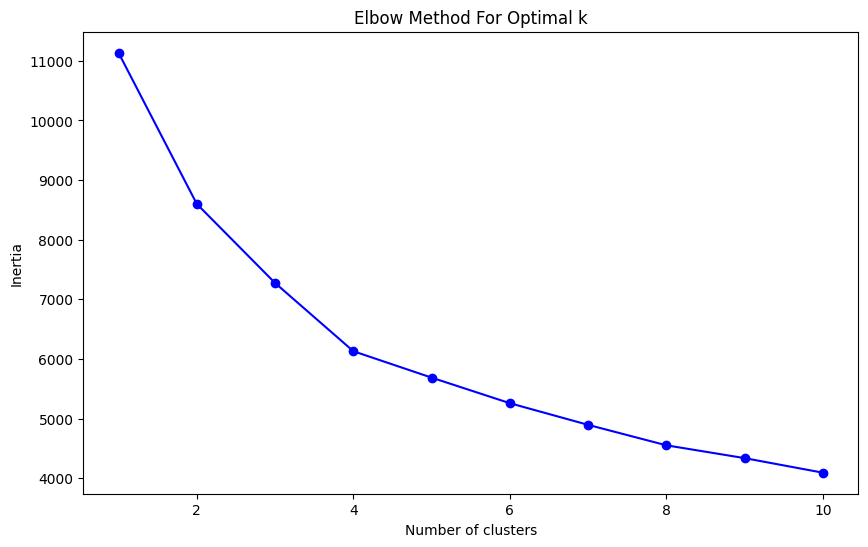

In [38]:
# Plot the inertia values to find the elbow point
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [39]:
optimal_clusters = 4

# Train the KMeans model with the optimal number of clusters on the training data
kmeans = KMeans(n_clusters=optimal_clusters,init='k-means++', n_init=10, random_state=42)
kmeans.fit(X_train)

# Assign cluster labels to the training data points
X_train['Cluster'] = kmeans.labels_

# Predict cluster labels for the testing data
X_test['Cluster'] = kmeans.predict(X_test)

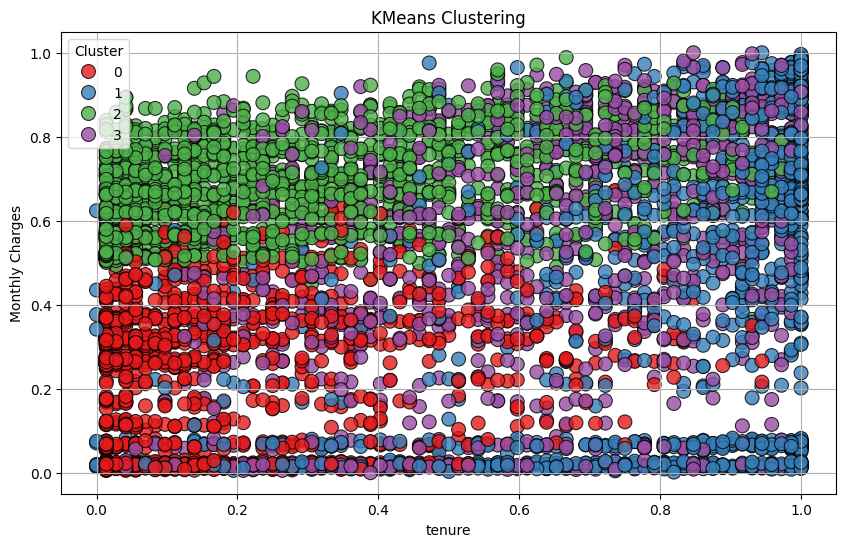

In [40]:
# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Cluster', data=X_train, palette='Set1', s=100, alpha=0.8, edgecolor='k')
plt.title('KMeans Clustering')
plt.xlabel('tenure')
plt.ylabel('Monthly Charges')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# **Define the Architecture of the ANN Model**

In [41]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Initialize the ANN
model = Sequential()

# Input layer and first hidden layer
model.add(Dense(units=16, activation='relu',name='input_layer', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.3))

# Second hidden layer
model.add(Dense(units=16, activation='relu'))
model.add(Dropout(0.3))

# Output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile the ANN
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# **Train the Model and Optimize Convergence**

In [42]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

# Train the ANN
history = model.fit(X_train.astype(np.float32), y_train.astype(np.float32), epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping, reduce_lr])


Epoch 1/100
141/141 [==============================] - 2s 4ms/step - loss: 0.6197 - accuracy: 0.6636 - val_loss: 0.4924 - val_accuracy: 0.7507 - lr: 0.0010
Epoch 2/100
141/141 [==============================] - 0s 3ms/step - loss: 0.5147 - accuracy: 0.7355 - val_loss: 0.4450 - val_accuracy: 0.7808 - lr: 0.0010
Epoch 3/100
141/141 [==============================] - 0s 3ms/step - loss: 0.4951 - accuracy: 0.7508 - val_loss: 0.4380 - val_accuracy: 0.7853 - lr: 0.0010
Epoch 4/100
141/141 [==============================] - 0s 3ms/step - loss: 0.4786 - accuracy: 0.7504 - val_loss: 0.4337 - val_accuracy: 0.7879 - lr: 0.0010
Epoch 5/100
141/141 [==============================] - 0s 3ms/step - loss: 0.4771 - accuracy: 0.7595 - val_loss: 0.4313 - val_accuracy: 0.7906 - lr: 0.0010
Epoch 6/100
141/141 [==============================] - 0s 3ms/step - loss: 0.4823 - accuracy: 0.7482 - val_loss: 0.4304 - val_accuracy: 0.7879 - lr: 0.0010
Epoch 7/100
141/141 [==============================] - 0s 3ms/st

# **Predict Customer Churn Based on Critical Attributes**

In [43]:
# Make Predictions
y_pred_prob = model.predict(X_test.astype(np.float32))
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary predictions


45/45 [==============================] - 0s 2ms/step


# **Evaluate Model Performance and Analyze Predictions**

In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Evaluate the model
loss, accuracy = model.evaluate(X_test.astype(np.float32), y_test.astype(np.float32))
print(f'Test Accuracy: {accuracy}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

# Precision, Recall, F1 Score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


45/45 [==============================] - 0s 8ms/step - loss: 0.4088 - accuracy: 0.8112
Test Accuracy: 0.8112136125564575
Confusion Matrix:
[[941  95]
 [171 202]]
Precision: 0.6801346801346801
Recall: 0.5415549597855228
F1 Score: 0.6029850746268657


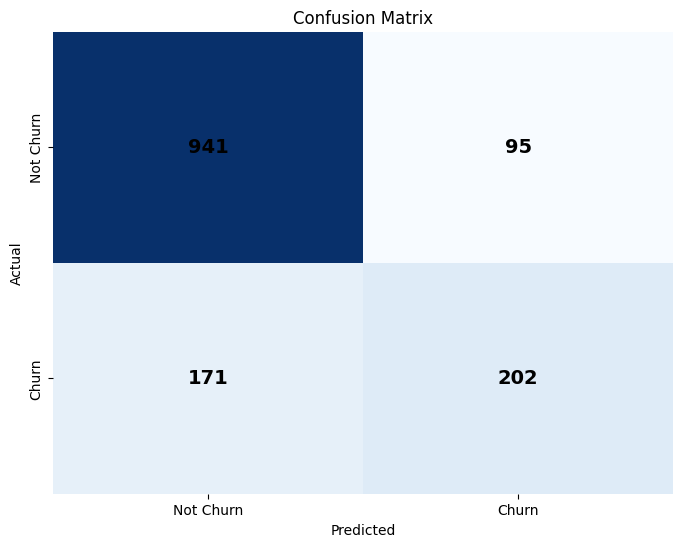

In [45]:
# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={'fontsize': 14, 'fontweight': 'bold', 'color': 'black'},
            xticklabels=['Not Churn', 'Churn'],
            yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [46]:
# Get the weights of the input layer
input_weights = model.get_layer('input_layer').get_weights()[0]

# Calculate the importance by summing the absolute values of the weights for each feature
feature_importance = np.sum(np.abs(input_weights), axis=1)

# Normalize the feature importance
feature_importance = feature_importance / np.sum(feature_importance)

# Ensure feature_names and feature_importance have the same length
feature_names = X_train.columns[:len(feature_importance)]  # Adjust feature_names to match

# Create a DataFrame to display feature importance
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

                    Feature  Importance
3                    tenure    0.143367
10        Contract_Two year    0.125252
7            MonthlyCharges    0.105211
6           InternetService    0.102486
8   Contract_Month-to-month    0.092857
4              PhoneService    0.082629
1             SeniorCitizen    0.069470
9         Contract_One year    0.067278
2                Dependents    0.061977
5             MultipleLines    0.058775
0                    gender    0.045752
11                  Cluster    0.044945


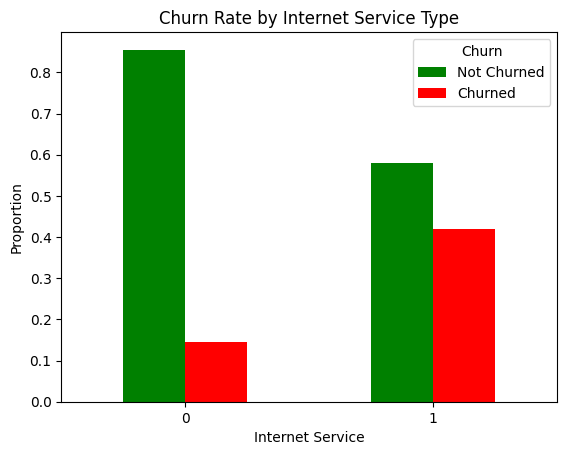

In [47]:
# Create a crosstab to summarize churn by internet service type
crosstab = pd.crosstab(df['InternetService'], df['Churn'], normalize='index')
crosstab.columns = ['Not Churned', 'Churned']

# Reset the index to use it for plotting
crosstab = crosstab.reset_index()

# Plot a grouped bar chart
crosstab.plot(x='InternetService', kind='bar', stacked=False, color=['green', 'red'])

# Add titles and labels
plt.title('Churn Rate by Internet Service Type')
plt.xlabel('Internet Service')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='Churn')
plt.show()
